<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Regular_minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
#importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset


<ipython-input-43-fc4a7d32cf1b>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Import and process the data

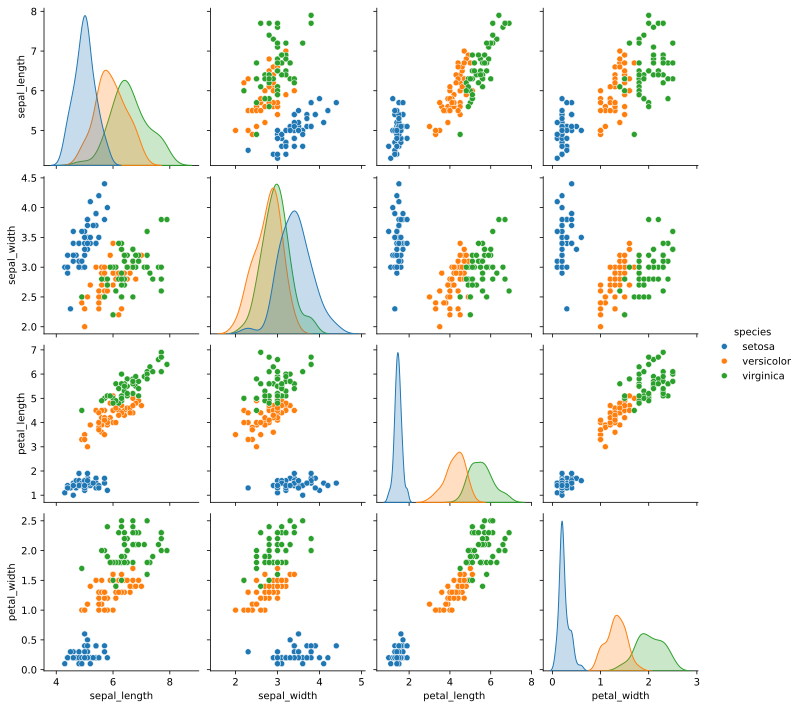

In [44]:
#import dataset(comes with seaborn)
import seaborn as sns
iris=sns.load_dataset('iris')
#check out the first few lines of data
iris.head()
#plot to show the data
sns.pairplot(iris, hue='species')
plt .show()

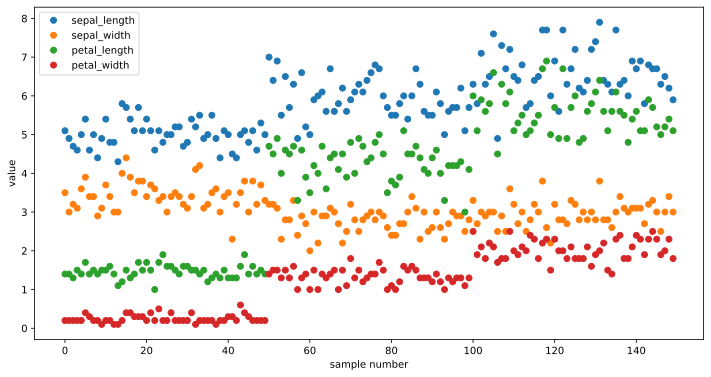

In [45]:
#PLOT THE DATA
iris.plot(marker='o',linestyle='none',figsize=(12,6))
plt.xlabel('sample number')
plt.ylabel('value' )
plt.show()

In [46]:
#organize the data
#convert form pandas dataframe to tensor
data=torch.tensor(iris[iris.columns[0:4]].values).float()
#transform species to number
labels=torch.zeros(len(data), dtype=torch.long)
#  0 not needed becauuse it is already initialized above
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2


Break the data into batches

In [47]:
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=0.2)
#then convert them into Pytorch datasets(note: already converted to tensors)
train_data=TensorDataset(train_data,train_labels)
test_data=TensorDataset(test_data,test_labels)
#finally, translate into dataloader objects
batchsize=4
train_loader=DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [48]:
#check sizes of data batches
for X,y in train_loader:
  print(X.shape)
  print(y.shape)

torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
torch.Size([4])
torch.Size([4, 4])
t


Create the ANN model

In [49]:
#model architecture
def createANewModel():
  ANNiris=nn.Sequential(
      nn.Linear(4,64),#input layer
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
      )
  #loss function
  lossfun=nn.CrossEntropyLoss()
  #optimizer
  optimizer=torch.optim.SGD(ANNiris.parameters(), lr=0.01)
  return ANNiris,lossfun,optimizer

Train the model


In [50]:
numepochs=2500
#initialize losses
def trainTheModel():
  trainAcc=[]
  testAcc=[]
  losses=[]
  #loop over epochs
  for epochi in range(numepochs):
    #loop over training data batches
    batchAcc=[]
    batchloss=[]
    for X,y in train_loader:
      #forward pass
      yHat=ANNiris(X)
      #compute loss
      loss=lossfun(yHat,y)
      #backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #COMPUTE TRAINING ACCURACY JUST FOR THIS BATCH
      batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
      batchloss.append(loss.item())
    #end of batch loop
    #now that we've trained through the batchrs, get their average training accuracy
    trainAcc.append(np.mean(batchAcc))
    losses.append(np.mean(batchloss))
    #test accuracy
    X,y=next(iter(test_loader)) #extract X,y from test dataloader
    testAcc.append(100*torch.mean((torch.argmax(ANNiris(X),axis=1)==y).float()).item())
#function output
  return trainAcc,testAcc,losses



Testing


In [51]:
#create a model
ANNiris,lossfun,optimizer=createANewModel()
#train the model
trainAcc,testAcc,losses=trainTheModel()

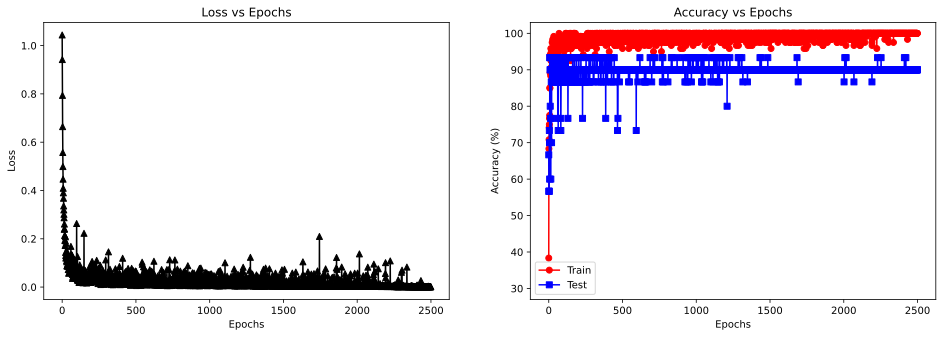

In [52]:
#plot the results
fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].plot(losses,'k^-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs Epochs')
ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy vs Epochs')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])
plt.show()